<a href="https://colab.research.google.com/github/davismaulana/PCVK_Ganjil_2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D. LATIHAN PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


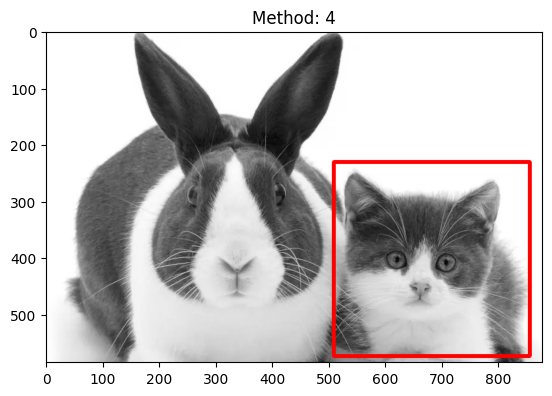

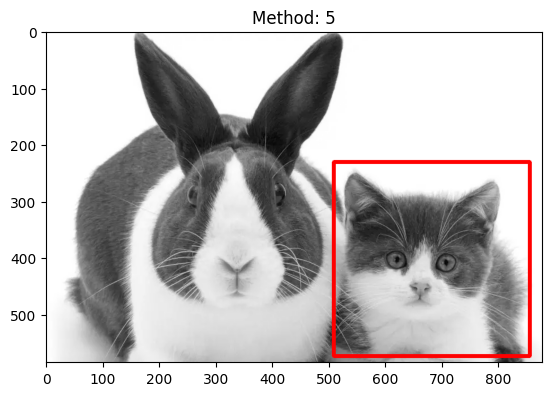

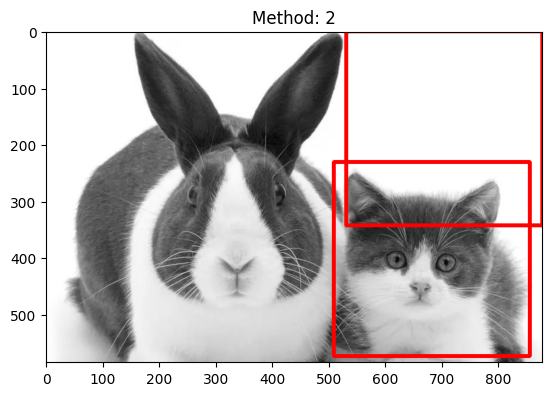

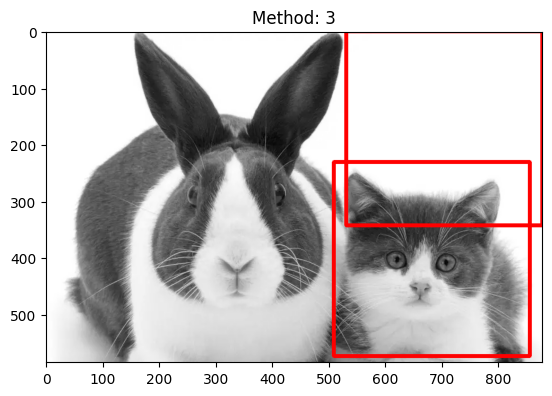

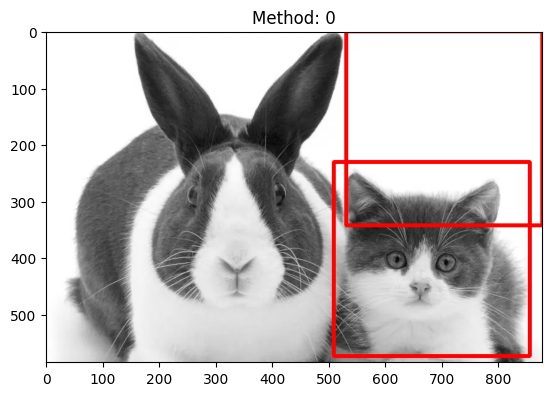

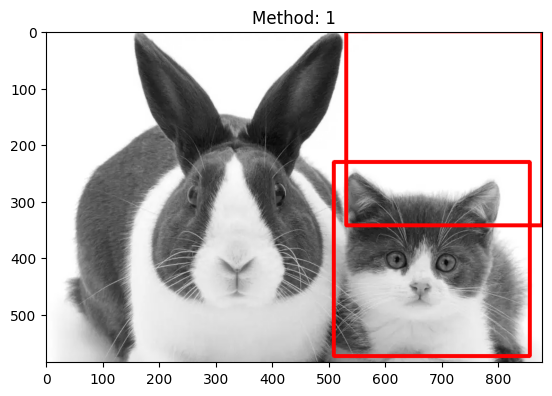

In [13]:
# Load source and template images
source_image = cv2.imread('/content/drive/MyDrive/Images/cats_and_bunnies.jpg', 0)
template_image = cv2.imread('/content/drive/MyDrive/Images/cats_template.jpg', 0)

source_image_color = cv2.cvtColor(source_image, cv2.COLOR_GRAY2BGR)

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    result = cv2.matchTemplate(source_image, template_image, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    location = min_loc if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] else max_loc
    h, w = template_image.shape

    # Draw a red rectangle on the color image
    cv2.rectangle(source_image_color, location, (location[0] + w, location[1] + h), (0, 0, 255), 5)

    # Display the result
    plt.imshow(cv2.cvtColor(source_image_color, cv2.COLOR_BGR2RGB))
    plt.title(f'Method: {method}')
    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

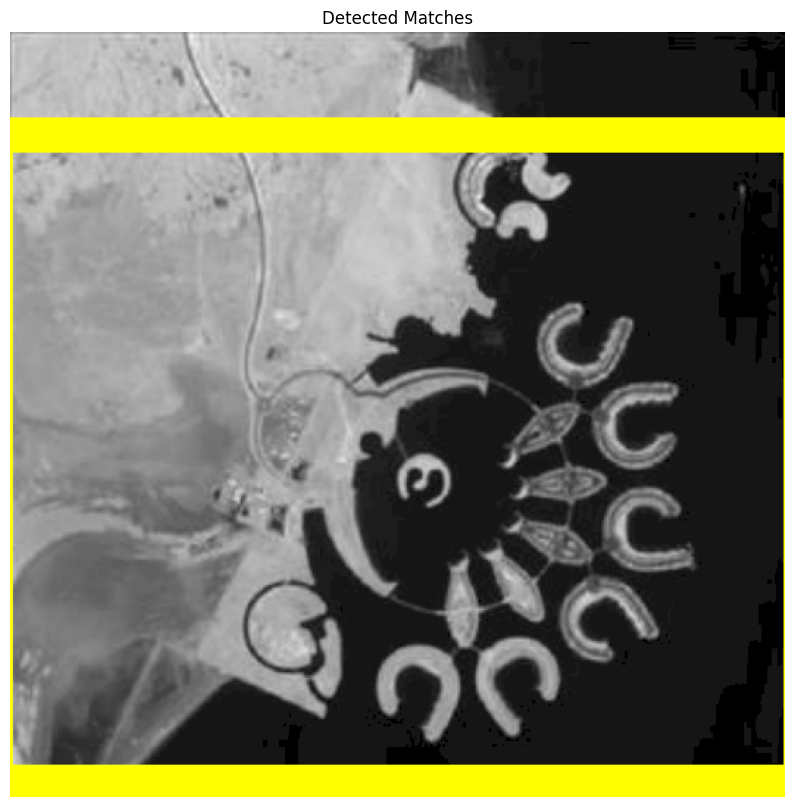

In [23]:
# Load source and template images
source_image = cv2.imread('/content/drive/MyDrive/PCVK/bahrain.png', 0)
template_image = cv2.imread('/content/drive/MyDrive/PCVK/bahrain-template.png', 0)

# Convert the source image to color to draw colored rectangles later
source_image_color = cv2.cvtColor(source_image, cv2.COLOR_GRAY2BGR)

# Manual Template Matching Example
def manual_template_matching(source, template):
    h, w = template.shape
    result = np.zeros((source.shape[0] - h + 1, source.shape[1] - w + 1), dtype=np.float32)

    # Calculate the sum of squared differences for each window position
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            window = source[i:i+h, j:j+w]
            result[i, j] = np.sum((window - template) ** 2)

    # Normalize the result for better visualization
    result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
    result = result.astype(np.uint8)

    return result

# Get the result of template matching
result = manual_template_matching(source_image, template_image)

# Threshold to find multiple matches (adjust threshold as needed)
threshold = 50
locations = np.where(result <= threshold)

# Draw rectangles around each detected location
h, w = template_image.shape
for pt in zip(*locations[::-1]):  # Switch x and y coordinates
    cv2.rectangle(source_image_color, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)  # Yellow rectangle

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(source_image_color, cv2.COLOR_BGR2RGB))
plt.title('Detected Matches')
plt.axis('off')
plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

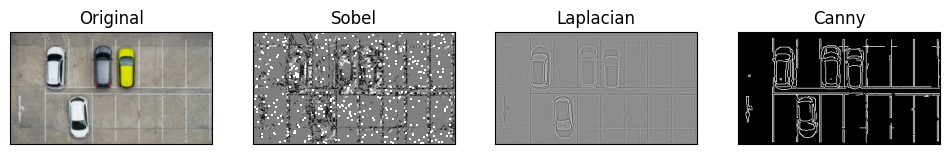

In [28]:
# Load image in color
image = cv2.imread('/content/drive/MyDrive/PCVK/cark-park.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

# Convert image to grayscale for edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.bitwise_or(sobelx, sobely)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Canny Edge Detection
canny = cv2.Canny(gray_image, 100, 200)

# Display results
plt.figure(figsize=(12, 6))

# Display the original image in RGB
plt.subplot(1, 4, 1), plt.imshow(image_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])

# Display Sobel edge detection result
plt.subplot(1, 4, 2), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

# Display Laplacian edge detection result
plt.subplot(1, 4, 3), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

# Display Canny edge detection result
plt.subplot(1, 4, 4), plt.imshow(canny, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()


5. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:


<ipython-input-33-e776809aaa0a>:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


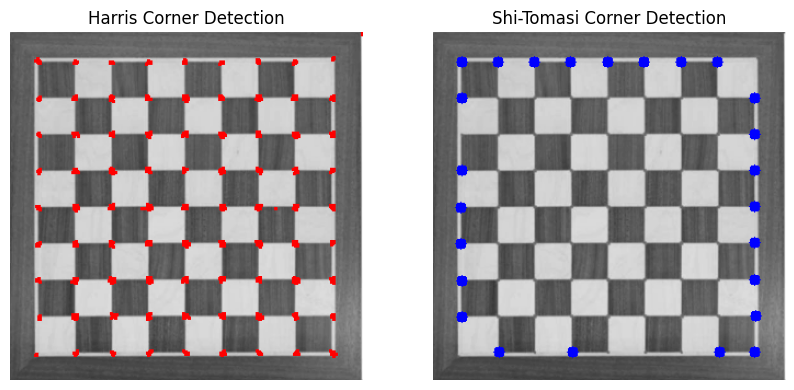

In [33]:
# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/chest-board.png', 0)

# Convert grayscale image to RGB for color visualization
image_harris = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
image_shi_tomasi = image_harris.copy()

# Harris Corner Detection
gray = np.float32(image)
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # Red color for Harris corners

# Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 5, (0, 0, 255), -1)  # Green color for Shi-Tomasi corners

# Display results
plt.figure(figsize=(10, 5))

# Harris corner detection result
plt.subplot(1, 2, 1)
plt.imshow(image_harris)
plt.title('Harris Corner Detection')
plt.axis('off')

# Shi-Tomasi corner detection result
plt.subplot(1, 2, 2)
plt.imshow(image_shi_tomasi)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

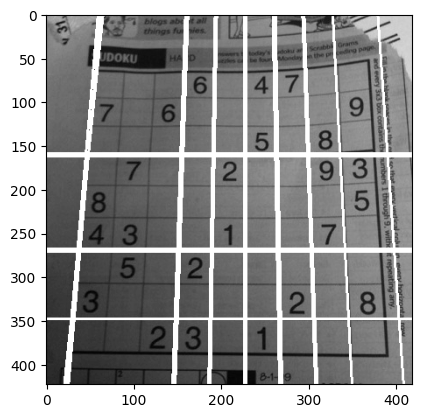

In [34]:
# Load image
image = cv2.imread('/content/drive/MyDrive/Images/sudoku-original.jpg', 0)
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Apply Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), 255, 2)

# Display result
plt.imshow(image, cmap='gray')
plt.show()


7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:


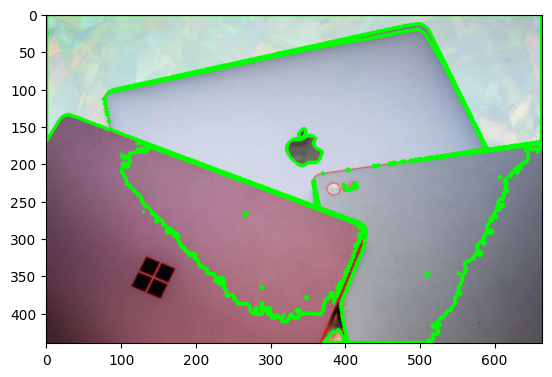

In [35]:
# Load image
image = cv2.imread('/content/drive/MyDrive/PCVK/laptops.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Display results
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()